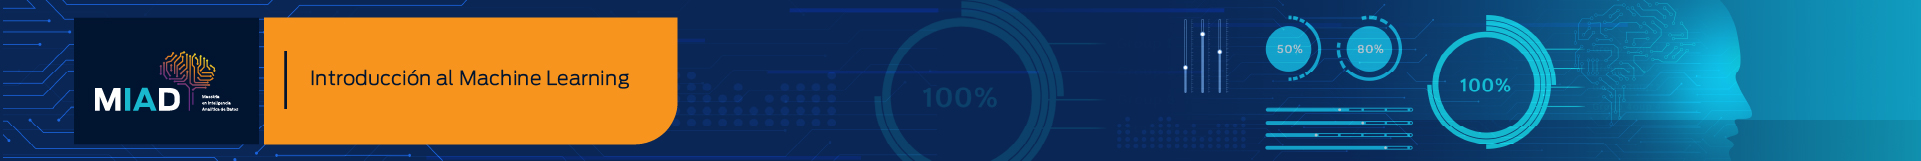

# Introducción al Machine Learning - Semana 5
## Caso: Aplicación de árboles de decisión y ensamblajes

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos basados en árboles y ensamblajes para seleccionar aquel que tenga el mejor desempeño para resolver un problema de clasificación. En particular, se deberán implementar modelos de árboles sencillos, random forest y gradient boosting.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son: 

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación modelo de árbol de decisión: Se estima el modelo usando un árbol de decisión, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de bagging: Se estima el modelo usando bagging, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos]

Estimación modelo de random forest: Se estima el modelo usando random forest, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Estimación modelo de gradient boosting: Se estima el modelo usando gradient boosting, se evalúa su desempeño en la muestra de test y se analizan correctamente los resultados y el procedimiento realizado. [20 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos] 


### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Weekly", la cual contiene 8 variables predictivas sobre el índice bursátil S&P500 y 1089 observaciones. De esta manera, el objetivo de la actividad es predecir si el precio del índice subirá o bajará la semana siguiente.

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-weekly

###  Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [23]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

import seaborn as sns

sns.set_style()

In [24]:
data_dir = "data/dataset-95529.csv"

data = pd.read_csv(data_dir)

XTrain, XTest, yTrain, yTest = train_test_split(data.drop(columns="Direction"), data["Direction"], test_size=0.3, random_state=0)
#del(data)


In [25]:
grilla = [4,2]
variables = ['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today']
grupo = 'Direction'

C:\Users\paulg\AppData\Local\Temp\ipykernel_20012\2888504411.py:155: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns_plot = sns.lineplot(y1, palette=['red'], linewidth=2.5,ax=ax[0])


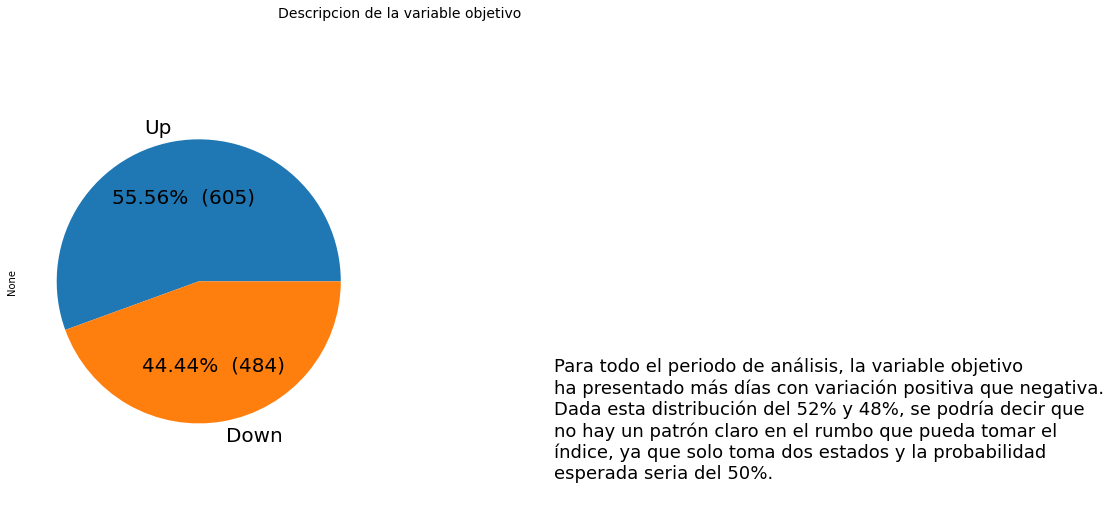

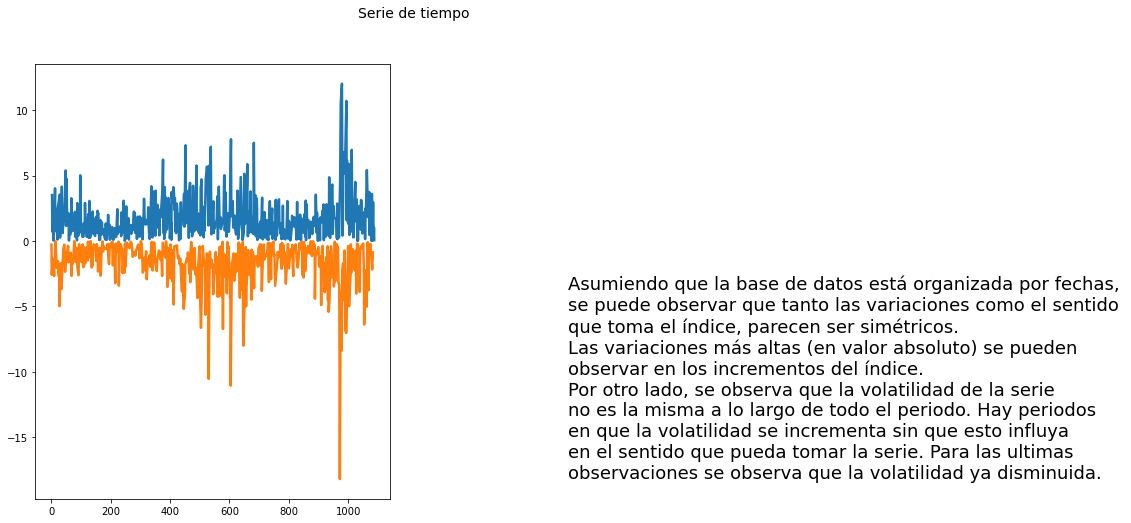

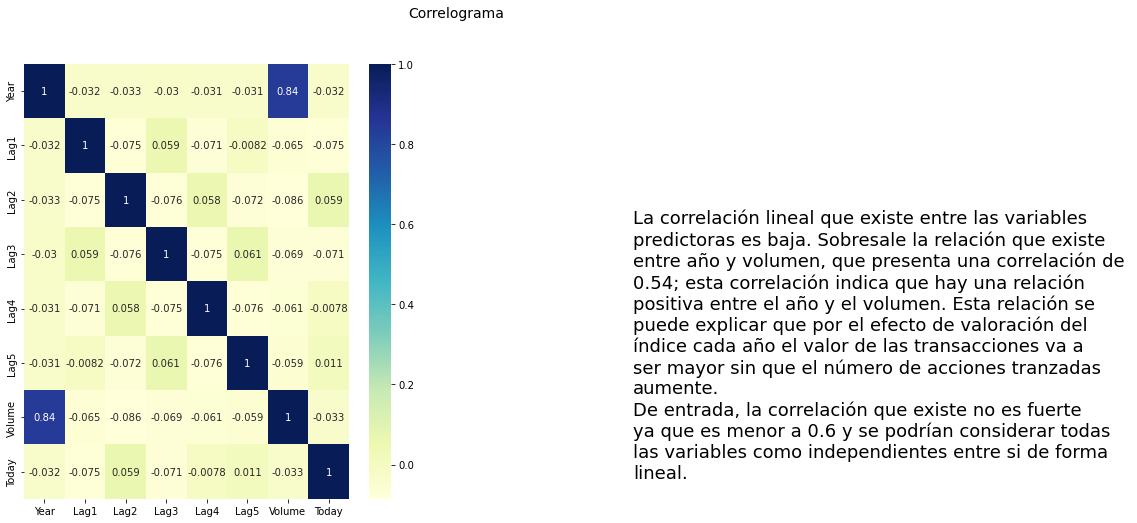

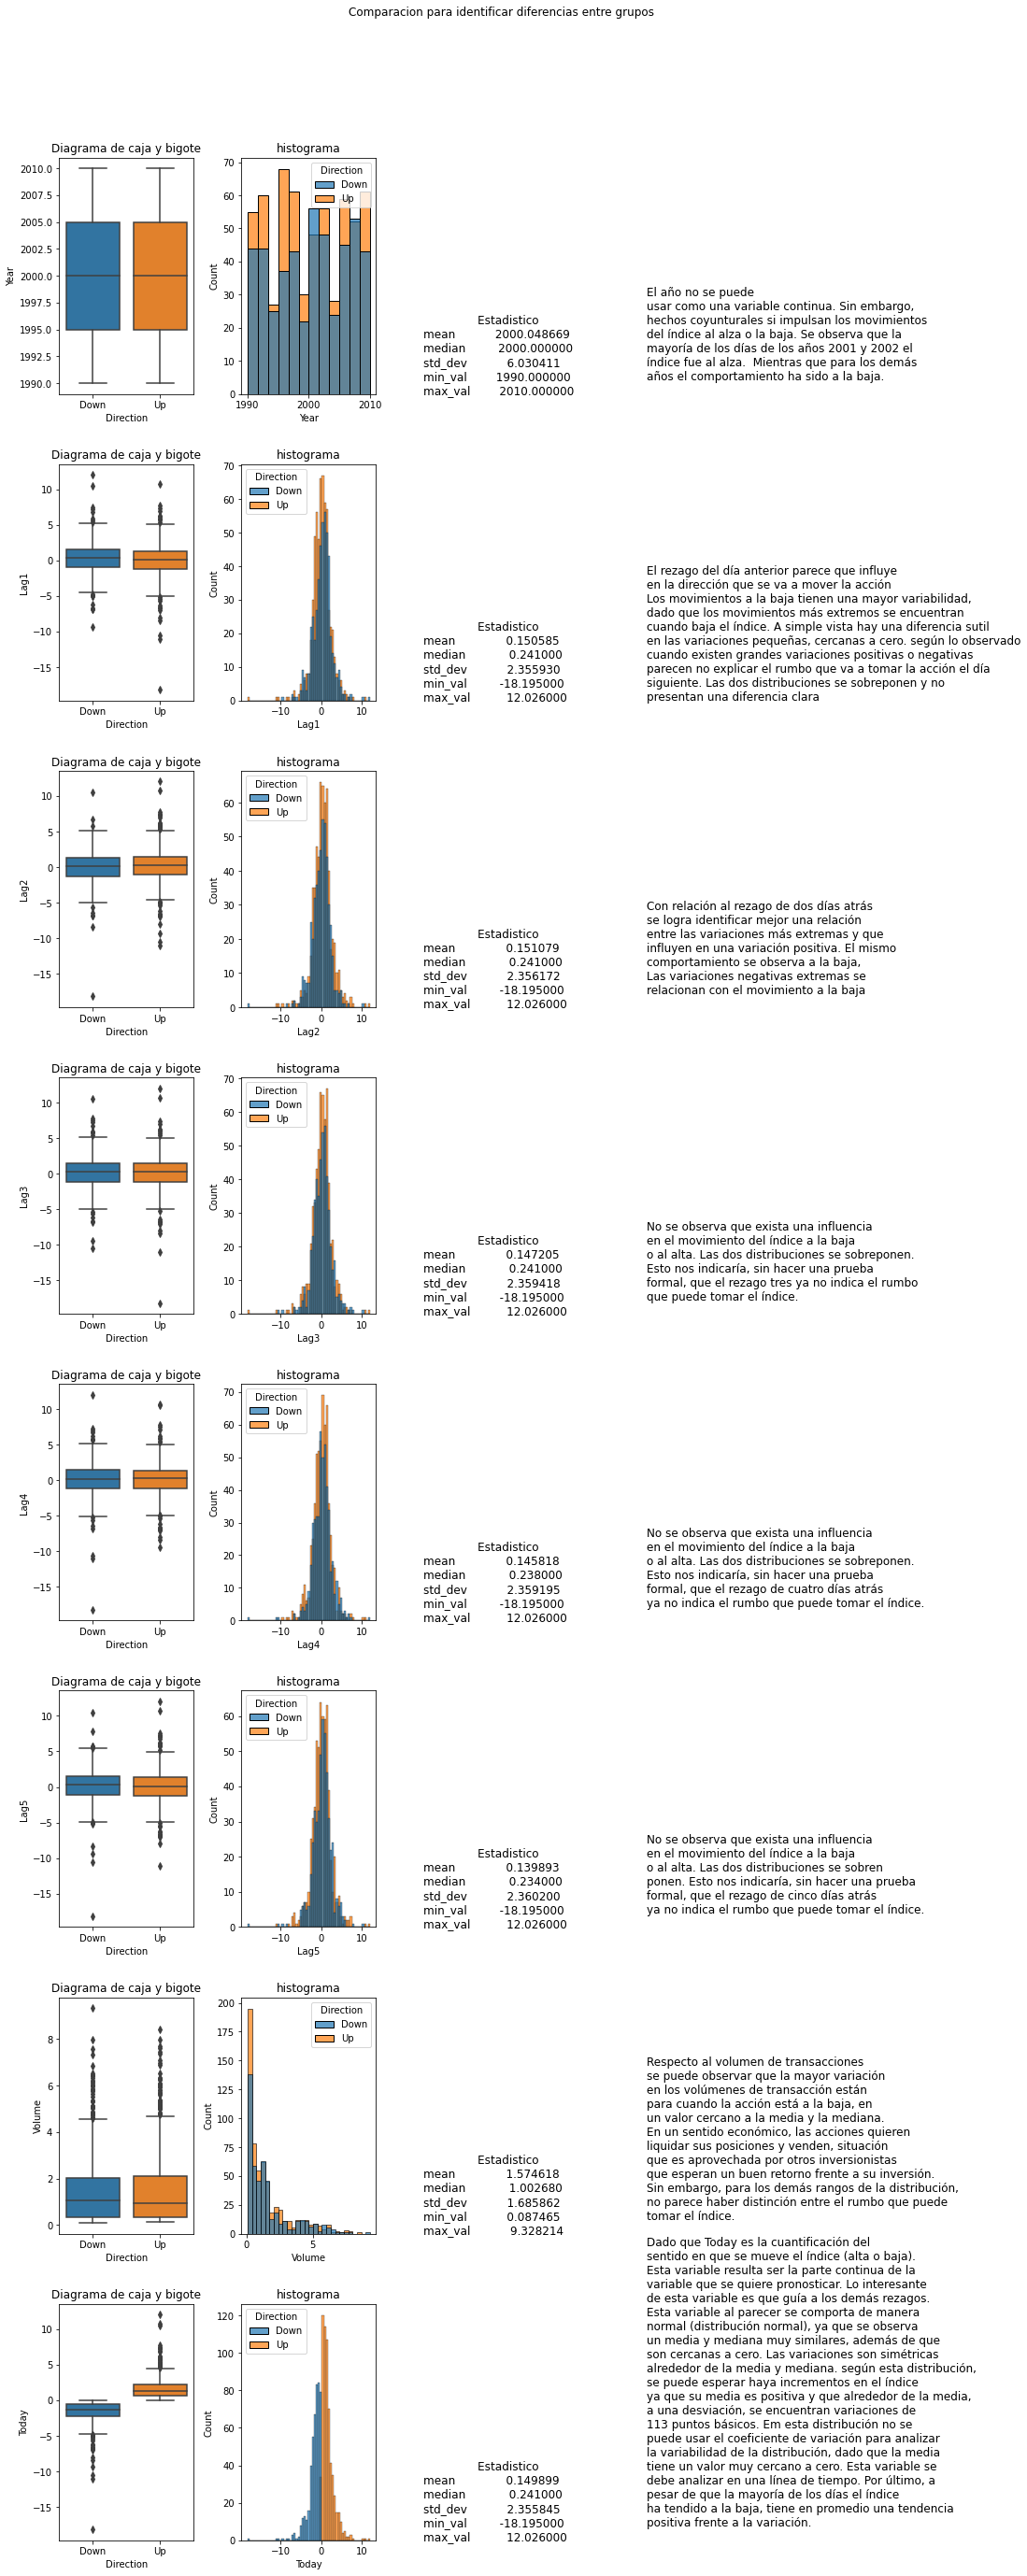

In [26]:
descripcion_variable_objetivo = """
Para todo el periodo de análisis, la variable objetivo
ha presentado más días con variación positiva que negativa.
Dada esta distribución del 52% y 48%, se podría decir que
no hay un patrón claro en el rumbo que pueda tomar el 
índice, ya que solo toma dos estados y la probabilidad
esperada seria del 50%.
"""

descripcion_serie = """
Asumiendo que la base de datos está organizada por fechas,
se puede observar que tanto las variaciones como el sentido 
que toma el índice, parecen ser simétricos.
Las variaciones más altas (en valor absoluto) se pueden 
observar en los incrementos del índice.
Por otro lado, se observa que la volatilidad de la serie
no es la misma a lo largo de todo el periodo. Hay periodos
en que la volatilidad se incrementa sin que esto influya 
en el sentido que pueda tomar la serie. Para las ultimas
observaciones se observa que la volatilidad ya disminuida.
"""

descripcion_correlograma = """
La correlación lineal que existe entre las variables
predictoras es baja. Sobresale la relación que existe 
entre año y volumen, que presenta una correlación de 
0.54; esta correlación indica que hay una relación 
positiva entre el año y el volumen. Esta relación se
puede explicar que por el efecto de valoración del
índice cada año el valor de las transacciones va a 
ser mayor sin que el número de acciones tranzadas
aumente.
De entrada, la correlación que existe no es fuerte
ya que es menor a 0.6 y se podrían considerar todas 
las variables como independientes entre si de forma
lineal.
"""

conclusiones ={}
conclusiones['Year'] ="""El año no se puede 
usar como una variable continua. Sin embargo,
hechos coyunturales si impulsan los movimientos
del índice al alza o la baja. Se observa que la 
mayoría de los días de los años 2001 y 2002 el 
índice fue al alza.  Mientras que para los demás
años el comportamiento ha sido a la baja.
"""

conclusiones['Lag1'] ="""El rezago del día anterior parece que influye 
en la dirección que se va a mover la acción  
Los movimientos a la baja tienen una mayor variabilidad,
dado que los movimientos más extremos se encuentran
cuando baja el índice. A simple vista hay una diferencia sutil
en las variaciones pequeñas, cercanas a cero. según lo observado
cuando existen grandes variaciones positivas o negativas
parecen no explicar el rumbo que va a tomar la acción el día
siguiente. Las dos distribuciones se sobreponen y no 
presentan una diferencia clara"""

conclusiones['Lag2'] ="""
Con relación al rezago de dos días atrás 
se logra identificar mejor una relación 
entre las variaciones más extremas y que
influyen en una variación positiva. El mismo
comportamiento se observa a la baja,
Las variaciones negativas extremas se
relacionan con el movimiento a la baja
"""
conclusiones['Lag3'] ="""
No se observa que exista una influencia
en el movimiento del índice a la baja 
o al alta. Las dos distribuciones se sobreponen.
Esto nos indicaría, sin hacer una prueba
formal, que el rezago tres ya no indica el rumbo
que puede tomar el índice.
"""
conclusiones['Lag4'] ="""
No se observa que exista una influencia
en el movimiento del índice a la baja 
o al alta. Las dos distribuciones se sobreponen. 
Esto nos indicaría, sin hacer una prueba
formal, que el rezago de cuatro días atrás
ya no indica el rumbo que puede tomar el índice.
"""

conclusiones['Lag5'] ="""
No se observa que exista una influencia
en el movimiento del índice a la baja 
o al alta. Las dos distribuciones se sobren
ponen. Esto nos indicaría, sin hacer una prueba
formal, que el rezago de cinco días atrás
ya no indica el rumbo que puede tomar el índice.
"""
conclusiones['Volume'] ="""
Respecto al volumen de transacciones
se puede observar que la mayor variación
en los volúmenes de transacción están 
para cuando la acción está a la baja, en 
un valor cercano a la media y la mediana.
En un sentido económico, las acciones quieren
liquidar sus posiciones y venden, situación
que es aprovechada por otros inversionistas 
que esperan un buen retorno frente a su inversión.
Sin embargo, para los demás rangos de la distribución,
no parece haber distinción entre el rumbo que puede 
tomar el índice.
"""
conclusiones['Today'] ="""
Dado que Today es la cuantificación del 
sentido en que se mueve el índice (alta o baja).
Esta variable resulta ser la parte continua de la
variable que se quiere pronosticar. Lo interesante
de esta variable es que guía a los demás rezagos.
Esta variable al parecer se comporta de manera
normal (distribución normal), ya que se observa 
un media y mediana muy similares, además de que
son cercanas a cero. Las variaciones son simétricas
alrededor de la media y mediana. según esta distribución,
se puede esperar haya incrementos en el índice 
ya que su media es positiva y que alrededor de la media,
a una desviación, se encuentran variaciones de 
113 puntos básicos. Em esta distribución no se 
puede usar el coeficiente de variación para analizar
la variabilidad de la distribución, dado que la media
tiene un valor muy cercano a cero. Esta variable se 
debe analizar en una línea de tiempo. Por último, a 
pesar de que la mayoría de los días el índice
ha tendido a la baja, tiene en promedio una tendencia
positiva frente a la variación.
"""

def summary_statistics(data):
    resultados = {}
    resultados["mean"] = np.mean(data)
    resultados["median"] = np.median(data)
    resultados["std_dev"] = np.std(data)
    resultados["min_val"] = np.min(data)
    resultados["max_val"] = np.max(data)
    return resultados

def grafico_torta(data, variable=grupo):
    fig, ax = plt.subplots(ncols=2, figsize=(14, 8))
    data.groupby(grupo).size().sort_index(ascending=False).plot(kind='pie', ax=ax[0],textprops={'fontsize': 20},autopct=lambda p : '{:.2f}%  ({:,.0f})'.format(p,p * sum(data.groupby(grupo).size())/100)) #,autopct='%.2f'
    #ax[0].set_ylabel('Direccion indicador', size=22)
    ax[1].text(0.3,0,descripcion_variable_objetivo,size=18)
    ax[1].axis('off')
    fig.suptitle('Descripcion de la variable objetivo', fontsize=14)
grafico_torta(data, variable=grupo)

def grafico_linea(data, variable="Today"):
    fig, ax = plt.subplots(ncols=2, figsize=(14, 8))
    y1 = [i if i >= 0 else None for i in data["Today"]]
    y2 = [i if i < 0 else None for i in data["Today"]]
    x = data.index.to_series()
    sns_plot = sns.lineplot(y1, palette=['red'], linewidth=2.5,ax=ax[0])
    sns_plot = sns.lineplot(y2, linewidth=2.5,ax=ax[0])
    ax[1].text(0.3,0,descripcion_serie,size=18)
    ax[1].axis('off')
    fig.suptitle('Serie de tiempo', fontsize=14)

grafico_linea(data)


#sns.lineplot(x = data.index, y = "Today", data = data)


def correlograma(data,tamanio=(16,8)):
    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=tamanio)
    corr = data.corr()
    sns.heatmap(corr, cmap="YlGnBu", annot=True,ax=ax[0])
    ax[1].text(0.3,0,descripcion_correlograma,size=18)
    ax[1].axis('off')
    fig.suptitle('Correlograma', fontsize=14)
correlograma(data)

def grafico_doble(variables,data,grupo,grilla):
    contador = 0
    fig, ax = plt.subplots(nrows=len(variables), ncols=4, figsize=(15, 45))
    for i in range(0,len(variables)):
        sns.boxplot(ax=ax[i,0],x=grupo, y=variables[i], data=data, palette='tab10')
        ax[i,0].set_title("Diagrama de caja y bigote")
        sns.histplot(ax=ax[i,1],data = data,x = variables[i],alpha = .7,hue = grupo)
        ax[i,1].set_title("histograma")
        ax[i,2].text(0,0,str(pd.DataFrame.from_dict(summary_statistics(data[variables[i]]),orient="index").rename(columns={0:"      Estadistico"})),size=12)
        ax[i,2].axis('off')
        ax[i,3].text(0.3,0,str(conclusiones[variables[i]]),size=12)
        ax[i,3].axis('off')
    plt.tight_layout()
    fig.subplots_adjust(top=0.8)
    fig.suptitle("Comparacion para identificar diferencias entre grupos", y=0.85,fontsize=12)
    plt.show()

grafico_doble(variables,data,grupo,grilla)

In [27]:
# Se elimina la variable "Today", ya que la variable objetivo es una transformacion de esta variable
data  = data.drop(columns=["Today"])

pct_test =  0.2
limite_train = int(np.round(len(data) * (1-pct_test)))

XTrain = data[:limite_train].drop(columns="Direction")
yTrain = data.loc[:limite_train-1,["Direction"]]

XTest = data[limite_train+1:].drop(columns="Direction")
yTest = data.loc[limite_train+1:,["Direction"]]

XTrain, XTest, yTrain, yTest = train_test_split(data.drop(columns="Direction"), data["Direction"], test_size=0.2, random_state=0)

yTest = (yTest == "Up").astype(int)
yTrain = (yTrain == "Up").astype(int)

### 2. Estimación modelo de árbol de decisión (20 puntos)
Estimen un árbol de decisión con la muestra de entrenamiento y calculen su poder predictivo evaluándolo en la muestra de test.

In [28]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####

clfTree = DecisionTreeClassifier()
clfTree.fit(XTrain, yTrain)


DecisionTreeClassifier()

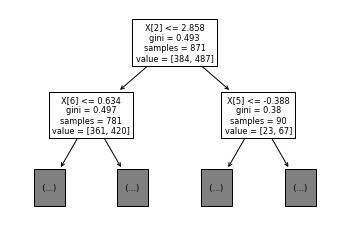

In [29]:
plot_tree(clfTree,max_depth=1)
plt.show()

### Base Train

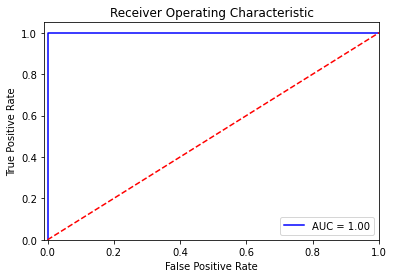

In [30]:
prediccionTree = clfTree.predict_proba(XTrain)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTrain, prediccionTree, pos_label=0)
AUCTree=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCTree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Base Test

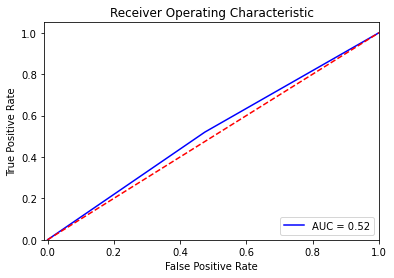

In [31]:
prediccionTree = clfTree.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionTree, pos_label=0)
AUCTree=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCTree)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Al comparar las curvas *ROC* de la Base Train vs la Base Test se evidencia un fenomeno de *overfitting* ya que para la Base Train se tiene un valor de 1, lo cual indica un poder de clasificación perfecto de todas las categorías de la Base Train. Sin embargo, al observar el valor en la curva de Test se ve un valor de *0.52*, esto es lo que nos dice que el modelo tiene sobreentrenamiento.

Al contar con pocos datos las reglas o cortes que encuentra el algoritmo son especificos para el set de train, de modo que la predicción en el set de Test se ve perjudicada.

### 3. Estimación modelo de bagging (20 puntos)
Estimen un modelo de bagging para árboles de decisión y calculen su poder predictivo evaluándolo en la muestra de test.

In [32]:
clfBag = BaggingClassifier(n_estimators=10, random_state=0)
clfBag.fit(XTrain, yTrain)

BaggingClassifier(random_state=0)

### Base Train

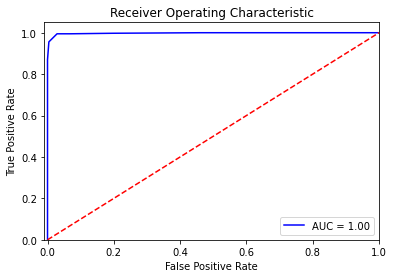

In [33]:
prediccionBag=clfBag.predict_proba(XTrain)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTrain, prediccionBag, pos_label=0)
AUCBag=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCBag)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Base Test

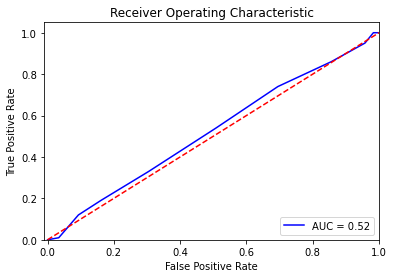

In [34]:
prediccionBag=clfBag.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionBag, pos_label=0)
AUCBag=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCBag)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Al igual que en el modelo de arboles de decisión, se comparan las curvas *ROC* de la Base Train vs la Base Test, y se evidencia un fenomeno de *overfitting* ya que para la Base Train se tiene un valor de 1, lo cual indica clasificación perfecta de todas las categorias de la Base Train, sin embargo al observar el valor en la curva de Test se ve un valor de *0.52*, esto nos dice que el modelo tiene sobreentrenamiento y que todas las $f$ creadas para el modelo de bagging captan el comportamiento específicamente del set de datos de entrenamiento. Esto también se debe aque la cantidad de datos para el modelo es reducida.

### 4. Estimación modelo de random forest (20 puntos)
Estimen un modelo de Random Forest y evalúen su poder predictivo en la muestra de test.

In [35]:
clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(XTrain, yTrain)

RandomForestClassifier(random_state=0)

### Base Train

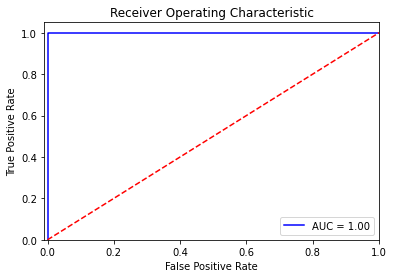

In [36]:
prediccionRF=clfRF.predict_proba(XTrain)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTrain, prediccionRF, pos_label=0)
AUCRF=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Base Test

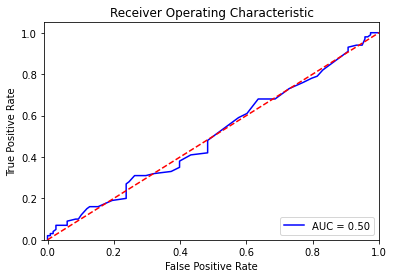

In [37]:
prediccionRF=clfRF.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionRF, pos_label=0)
AUCRF=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

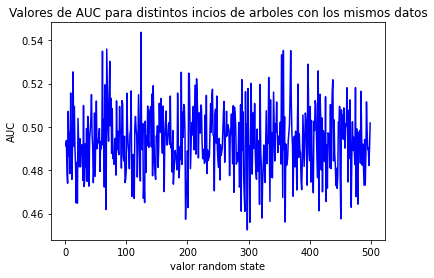

In [38]:
random_array = np.arange(1,500,1)
AUC_array = []


for i in random_array:

    clfRF = RandomForestClassifier(random_state=i)
    clfRF.fit(XTrain, yTrain)
    prediccionRF=clfRF.predict_proba(XTest)[:,0]
    fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionRF, pos_label=0)
    AUCRF=metrics.auc(fpr, tpr)

    AUC_array.append(AUCRF)

plt.title('Valores de AUC para distintos incios de arboles con los mismos datos')
plt.plot(random_array, AUC_array, 'b',)
plt.ylabel('AUC')
plt.xlabel('valor random state')
plt.show()


Este puede observarse como el mismo caso de overfitting de los modelos pasados, y por los mismos motivos. Sin embargo las gráficas de la cruva *ROC* para el set de test tienen un comportamiento más errático, esto puede intepretarse como que los distintos arboles muestran distintos comportamientos que difieren entre si a la hora de realizar el "promedio" de la $y_{pred}$, y muestran incrementos distintos en la tasa de Falsos Positivos y Falsos Negativos.

En la última gráfica se itera por distinos parametros de *random_state* para evidenciar el comportamiento errático del modelo, y que, al parecer, la calidad de los datos no permite obtener un buen comportamiento en la clasificación.

### 5. Estimación modelo de gradient boosting (20 puntos)
Estimen un modelo de Gradient Boosting y evalúen su poder predictivo en la muestra de test.

In [39]:
clfGB= GradientBoostingClassifier(learning_rate=1.0,max_depth=1,random_state=0)
clfGB.fit(XTrain, yTrain)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

### Base Train

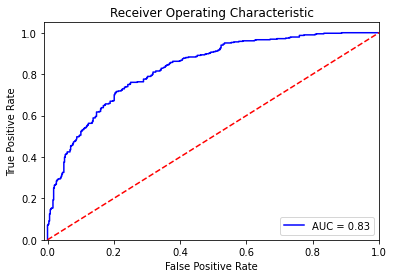

In [40]:
prediccionGB=clfGB.predict_proba(XTrain)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTrain, prediccionGB, pos_label=0)
AUCGB=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCGB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Base Test

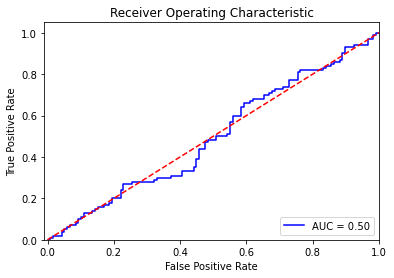

In [41]:
prediccionGB=clfGB.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionGB, pos_label=0)
AUCGB=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCGB)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Esta vez también se observa el mismo comportamiento que en los modelos anteriores: Buen desempeño en el set de Train, mientras que el desempeño es deficiente en el set de Test. Sin embargo, a diferencia de las otras evaluaciones, esta curva *ROC* es más irregular, lo que puede interpretarse como que, a medida que se mueve el umbral de clasificacion, la tasa de verdaderos positivos se mantiene, mientras que la tasa de falsos positivos aumenta. es decir las nuevas predcciones fruto de este nuevo umbral son todas incorrectas.

### 6. Selección del mejor modelo (10 puntos)
¿Cuál modelo de los estimados en este caso resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

C:\Users\paulg\AppData\Local\Temp\ipykernel_20012\2180911394.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ejeX, ha='center')


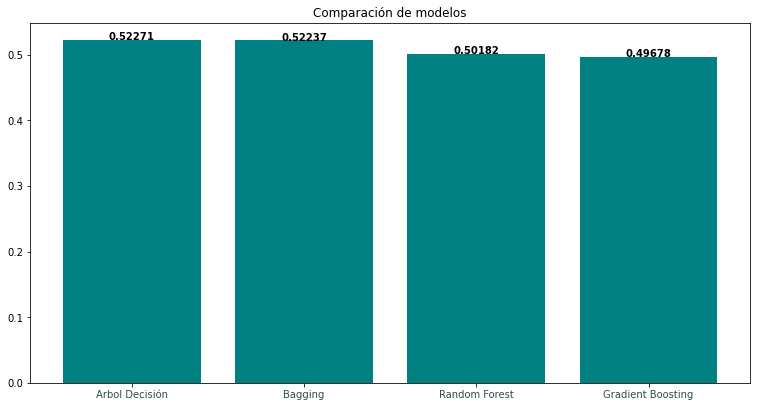

In [42]:
MSE_models = [round(AUCTree,5),round(AUCBag,5),round(AUCRF,5),round(AUCGB,5)]
    
fig = plt.figure(figsize=(10,5))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")

ejeX = ['Arbol Decisión', 'Bagging', 'Random Forest','Gradient Boosting']
ejeY = MSE_models

ax.bar(ejeX,ejeY, color='teal')

ax.set_xticklabels(ejeX, ha='center')

for label in ax.get_xticklabels():
    label.set_color('darkslategray')
    
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i], ha='center', color='black', fontweight='bold')

addlabels(ejeX, ejeY, ax)

plt.show()

Observando unicamente los valores de *ROC* en los distintos modelos se deberia escoger el modelo de Arbol de Decision, sin embargo observando que todos los modelos presentan overfitting y sus valores de ROC dependen en mayor medida de la aleatoriedad dado el bajo poder predictivo que tienen los datos, parece que no hay diferencia entre escoger uno u otro modelo. Esto se evidencia también en el hecho de que un árbol de decisión por sí solo tuvo mejor desempeño que un método de stacking (Bagging).

Para mejorar esto y tener una mejor conclusón sobre los modelos se puede realizar ingeniería de datos o tomar una mayor muestra de datos, pero esto puede no ser muy útil, ya que los datos financieros no son predecibles.